In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from scipy import stats

In [ ]:
#Read data from CSV
url = "https://raw.githubusercontent.com/VivekReddy08/INFO6105DataScience/main/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')
#Display data
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [ ]:
df.shape

(4998, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

# **Data Cleaning:**

- Check for and handle missing values.
- Convert the 'Date' column to a datetime format.
- Explore and handle any inconsistencies or errors in the data.

In [ ]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [ ]:
# Convert data types if needed (e.g., convert 'Date' column to datetime)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:

# Handle missing values, for example, by filling them with appropriate values
# For numerical columns:
df['Aboard'].fillna(df['Aboard'].median(), inplace=True)
# For categorical columns:
df['Operator'].fillna('Unknown', inplace=True)

In [ ]:
# Address inconsistent values, for example, by standardizing operator names
df['Operator'] = df['Operator'].str.strip().str.title()

In [ ]:
# Identify and handle outliers, for example, by capping extreme values
# Cap 'Fatalities' column at 99th percentile
max_fatalities = df['Fatalities'].quantile(0.99)
df['Fatalities'] = df['Fatalities'].clip(upper=max_fatalities)


In [ ]:
# Check for data integrity issues, for example, by verifying Aboard = Aboard Passengers + Aboard Crew
df['Aboard_Check'] = df['Aboard Passangers'] + df['Aboard Crew']
integrity_check = df[df['Aboard'] != df['Aboard_Check']]

In [ ]:
# Resolve data integrity issues
# For example, update 'Aboard' column with the sum of passengers and crew
df['Aboard'] = df['Aboard Passangers'] + df['Aboard Crew']

In [ ]:
# Check and standardize text casing in categorical columns
df['Location'] = df['Location'].str.title()

In [ ]:
# Check for and remove duplicate records
df_duplicates = df[df.duplicated()]
df = df.drop_duplicates()

# **Descriptive Statistics:**

- Compute summary statistics for key numerical columns (e.g., Aboard, Fatalities).
- Analyze the distribution of fatalities.

In [ ]:
# Compute summary statistics for key numerical columns
summary_stats = df[['Aboard', 'Fatalities']].describe()
summary_stats

,Aboard,Fatalities
count,4768.000000,4990.000000
mean,31.474832,21.664830
std,46.152598,30.136251
min,0.000000,0.000000
25%,6.000000,4.000000
50%,16.000000,11.000000
75%,35.000000,25.000000
max,644.000000,168.110000


In [ ]:
# Compute mean, median, and standard deviation for 'Aboard' and 'Fatalities'
mean_aboard = df['Aboard'].mean()
median_aboard = df['Aboard'].median()
std_aboard = df['Aboard'].std()

mean_fatalities = df['Fatalities'].mean()
median_fatalities = df['Fatalities'].median()
std_fatalities = df['Fatalities'].std()

print(f"Mean Aboard: {mean_aboard}")
print(f"Median Aboard: {median_aboard}")
print(f"Standard Deviation Aboard: {std_aboard}")

print(f"\nMean Fatalities: {mean_fatalities}")
print(f"Median Fatalities: {median_fatalities}")
print(f"Standard Deviation Fatalities: {std_fatalities}")


Mean Aboard: 31.4748322147651
Median Aboard: 16.0
Standard Deviation Aboard: 46.15259796708916

Mean Fatalities: 21.66482965931863
Median Fatalities: 11.0
Standard Deviation Fatalities: 30.136251135676595


In [ ]:

# Create a histogram using Plotly Express
fig = px.histogram(df, x='Fatalities', nbins=30, marginal='box', color_discrete_sequence=['skyblue'])
fig.update_layout(
    title='Distribution of Fatalities',
    xaxis_title='Fatalities',
    yaxis_title='Frequency'
)
fig.show()

In [ ]:

# Create a box plot using Plotly Express
fig = px.box(df, y='Fatalities', color_discrete_sequence=['lightcoral'])
fig.update_layout(
    title='Box Plot of Fatalities',
    yaxis_title='Fatalities'
)
fig.show()

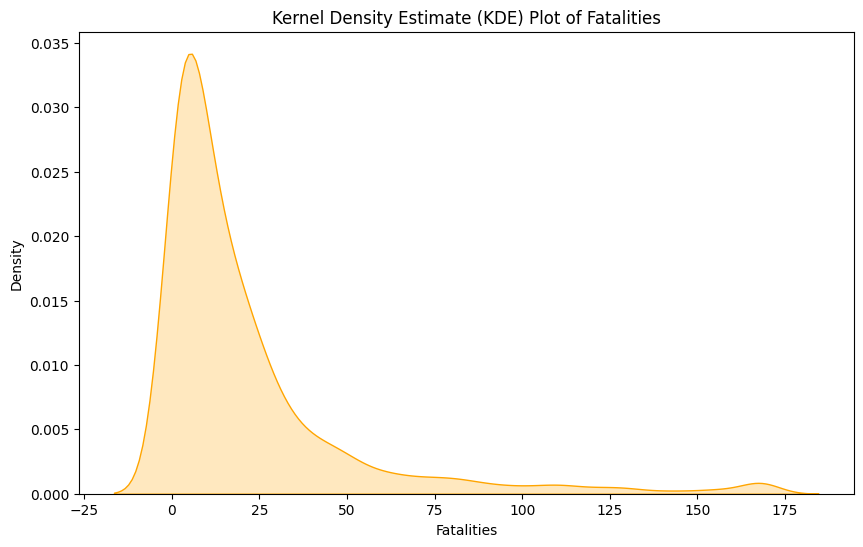

In [ ]:
# Plot a KDE plot for a smooth representation of the distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fatalities'], fill=True, color='orange')
plt.title('Kernel Density Estimate (KDE) Plot of Fatalities')
plt.xlabel('Fatalities')
plt.show()

# **Temporal Analysis:**
- Plot the number of accidents over time to identify any trends.
- Examine the yearly variation in the number of fatalities.

In [ ]:
df['Year'] = df['Date'].dt.year

# Number of accidents over time
fig_accidents = px.line(df['Year'].value_counts().sort_index(), markers=True, labels={'index': 'Year', 'value': 'Number of Accidents'})
fig_accidents.update_layout(title='Number of Accidents Over Time', xaxis_title='Year', yaxis_title='Number of Accidents')

# Yearly variation in the number of fatalities
fig_fatalities = px.bar(df.groupby('Year')['Fatalities'].sum(), labels={'Fatalities': 'Total Fatalities'})
fig_fatalities.update_layout(title='Yearly Variation in Fatalities', xaxis_title='Year', yaxis_title='Total Fatalities')

# Show the plots
fig_accidents.show()
fig_fatalities.show()

# **Operator Analysis:**
- Identify operators with the highest number of accidents.
- Investigate whether there are operators associated with a higher proportion of fatalities.

In [ ]:

# Identify operators with the highest number of accidents
top_operators_accidents = df['Operator'].value_counts().nlargest(10)

# Plot the top operators with the highest number of accidents
fig_accidents = px.bar(top_operators_accidents, x=top_operators_accidents.index, y=top_operators_accidents.values,
                       labels={'x': 'Operator', 'y': 'Number of Accidents'},
                       title='Top Operators with the Highest Number of Accidents',
                       color=top_operators_accidents.values,
                       color_continuous_scale='Blues')
fig_accidents.show()

# Investigate operators associated with a higher proportion of fatalities
fatalities_by_operator = df.groupby('Operator')['Fatalities'].sum()
accidents_by_operator = df['Operator'].value_counts()

# Calculate the proportion of fatalities per accident for each operator
proportion_fatalities = (fatalities_by_operator / accidents_by_operator).sort_values(ascending=False)

# Plot the operators with the highest proportion of fatalities
top_operators_fatalities = proportion_fatalities.nlargest(10)
fig_fatalities = px.bar(top_operators_fatalities, x=top_operators_fatalities.index, y=top_operators_fatalities.values,
                        labels={'x': 'Operator', 'y': 'Proportion of Fatalities per Accident'},
                        title='Top Operators with the Highest Proportion of Fatalities',
                        color=top_operators_fatalities.values,
                        color_continuous_scale='Reds')
fig_fatalities.show()


# **Aircraft Type Analysis:**
- Explore the distribution of accidents by aircraft type.
- Analyze if certain types of aircraft are more prone to fatal incidents.

In [ ]:

# Explore the distribution of accidents by aircraft type
fig_aircraft_distribution = px.histogram(df, x='AC Type', title='Distribution of Accidents by Aircraft Type',
                                         labels={'AC Type': 'Aircraft Type', 'count': 'Number of Accidents'},
                                         color_discrete_sequence=['skyblue'])
fig_aircraft_distribution.update_layout(xaxis_title='Aircraft Type', yaxis_title='Number of Accidents')
# Show the plots
fig_aircraft_distribution.show()


# **Location Analysis:**
- Identify regions or countries with a high frequency of accidents.
- Investigate if there are specific locations associated with higher fatalities.


In [ ]:

# Filter data with non-null values for 'Aboard' and 'Fatalities'
df_filtered = df.dropna(subset=['Aboard', 'Fatalities'])

# Identify regions or countries with a high frequency of accidents
fig_accidents_by_location = px.scatter(df_filtered,
                                       x='Location',
                                       y='Aboard',
                                       title='Accidents Frequency by Location',
                                       labels={'Location': 'Location', 'Aboard': 'Number of Passengers'},
                                       color='Aboard',
                                       size='Aboard')
fig_accidents_by_location.update_layout(xaxis_title='Location', yaxis_title='Number of Passengers')

# Investigate if there are specific locations associated with higher fatalities
fig_fatalities_by_location = px.scatter(df_filtered.groupby('Location')['Fatalities'].sum().reset_index(),
                                         x='Location',
                                         y='Fatalities',
                                         title='Fatalities by Location',
                                         labels={'Location': 'Location', 'Fatalities': 'Total Fatalities'},
                                         color='Fatalities',
                                         size='Fatalities')
fig_fatalities_by_location.update_layout(xaxis_title='Location', yaxis_title='Total Fatalities')

# Show the plots
fig_accidents_by_location.show()
fig_fatalities_by_location.show()

In [ ]:
# Clean the data by replacing or dropping missing values
df_cleaned = df.dropna(subset=['Aboard', 'Fatalities'])

# Identify regions or countries with a high frequency of accidents
fig_accidents_by_location = px.scatter_geo(df_cleaned,
                                           locations='Location',
                                           title='Accidents Frequency by Location',
                                           labels={'Location': 'Location', 'Aboard': 'Aboard'},
                                           color='Aboard',
                                           size='Aboard',
                                           projection='natural earth')
fig_accidents_by_location.update_geos(projection_type="natural earth", showcoastlines=True, coastlinecolor="Black")

# Investigate if there are specific locations associated with higher fatalities
fig_fatalities_by_location = px.scatter_geo(df_cleaned.groupby('Location')['Fatalities'].sum().reset_index(),
                                             locations='Location',
                                             title='Fatalities by Location',
                                             labels={'Location': 'Location', 'Size': 'Fatalities'},
                                             color='Fatalities',
                                             size='Fatalities',
                                             projection='natural earth')
fig_fatalities_by_location.update_geos(projection_type="natural earth", showcoastlines=True, coastlinecolor="Black")

# Show the plots
fig_accidents_by_location.show()
fig_fatalities_by_location.show()

MIT License

Copyright (c) 2024 VivekReddy08

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


REFERENCES:

https://www.kaggle.com/code/rathodjitesh/airplane-crashes-eda

https://www.kaggle.com/code/rathodjitesh/airplane-crashes-eda/input
